## **SCORING - Acetylcholinesterase**
#### **Micha Birklbauer 2021-10-08**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/PIAScore.py", "PIAScore.py")

'PIAScore.py'

In [2]:
import pandas as pd
from PIAScore import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrophobic_Interaction:PHE297A,Pi-Cation_Interaction:TRP86A,Water_Bridge:GLY120A,Pi-Stacking:TRP86A,Hydrophobic_Interaction:TYR341A,Halogen_Bond:THR75A,Halogen_Bond:TRP286A,Hydrogen_Bond:ASN87A,...,Water_Bridge:THR83A,Hydrogen_Bond:GLN291A,Halogen_Bond:GLY120A,Water_Bridge:THR75A,Pi-Cation_Interaction:TYR341A,Hydrogen_Bond:SER125A,Water_Bridge:ALA204A,Pi-Stacking:TYR124A,Hydrophobic_Interaction:GLU202A,LABEL
0,1,ZINC39710553|decoys_final2|sdf|80,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,inactive
1,2,ZINC39711540|decoys_final2|sdf|89,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,inactive
2,3,ZINC39710360|decoys_final2|sdf|76,1,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
3,4,CHEMBL374981|actives_final|sdf|138,0,0,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
4,5,CHEMBL219264|actives_final|sdf|334,0,0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,760,CHEMBL576005|actives_final|sdf|279,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
760,761,CHEMBL153865|actives_final|sdf|341,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
761,762,CHEMBL146674|actives_final|sdf|297,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
762,763,ZINC04195090|decoys_final2|sdf|324,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(764, 138) 427


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(192, 138) 104


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(239, 138) 133


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Water_Bridge:ASP74A,0.547036,1.337237,1.884273
1,2,Pi-Stacking:TRP286A,0.448127,0.822014,0.373887
2,3,Hydrogen_Bond:TYR124A,0.409753,0.323185,0.732938
3,4,Hydrophobic_Interaction:ASP74A,0.372518,0.117096,0.489614
4,5,Hydrophobic_Interaction:TYR124A,0.265096,0.203747,0.468843
...,...,...,...,...,...
130,131,Hydrophobic_Interaction:ARG296A,0.001091,0.007026,0.005935
131,132,Water_Bridge:GLY126A,0.000625,0.002342,0.002967
132,133,Hydrogen_Bond:TRP286A,0.000625,0.002342,0.002967
133,134,Water_Bridge:THR83A,0.000625,0.002342,0.002967


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat4 Accuracy: 0.7814136125654451
Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.7774869109947644
Key: 0.0, 0.05, 0.0: strat3 Accuracy: 0.768324607329843
Key: 0.05, 0.0, 0.0: strat3 Accuracy: 0.7657068062827225
Key: 0.15000000000000002, 0.0, 0.0: strat3 Accuracy: 0.7657068062827225


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.8514409412157139
Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.8495437772326424
Key: 0.05, 0.0, 0.0: strat3 Area under the ROC curve: 0.8412532401198062
Key: 0.05, 0.05, 0.0: strat3 Area under the ROC curve: 0.8372400086171551
Key: 0.05, 0.0, 0.0: strat4 Area under the ROC curve: 0.8372295846392261


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.1, 0.0, 0.05: strat3 Accuracy: 0.765625
Key: 0.1, 0.05, 0.05: strat3 Accuracy: 0.765625
Key: 0.1, 0.0, 0.1: strat3 Accuracy: 0.7604166666666666
Key: 0.1, 0.0, 0.15000000000000002: strat3 Accuracy: 0.7604166666666666
Key: 0.1, 0.0, 0.2: strat3 Accuracy: 0.7604166666666666


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.8558784965034965
Key: 0.0, 0.0, 0.05: strat3 Area under the ROC curve: 0.8438592657342657
Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.8377950174825175
Key: 0.0, 0.05, 0.0: strat3 Area under the ROC curve: 0.8358828671328672
Key: 0.0, 0.05, 0.05: strat3 Area under the ROC curve: 0.8330965909090908


In [16]:
features_filtered = get_relevant_features(features, 0.1, 0.05, 0.05)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Water_Bridge:ASP74A,0.547036,1.337237,1.884273
1,2,Pi-Stacking:TRP286A,0.448127,0.822014,0.373887
2,3,Hydrogen_Bond:TYR124A,0.409753,0.323185,0.732938
3,4,Hydrophobic_Interaction:ASP74A,0.372518,0.117096,0.489614
4,5,Hydrophobic_Interaction:TYR124A,0.265096,0.203747,0.468843
5,6,Water_Bridge:SER293A,0.261642,0.353630,0.091988
6,7,Hydrogen_Bond:ASP74A,0.238987,0.117096,0.356083
8,9,Water_Bridge:SER125A,0.193532,0.091335,0.284866
9,10,Pi-Stacking:TYR337A,0.166360,0.100703,0.267062
10,11,Hydrophobic_Interaction:LEU289A,0.159181,0.381733,0.222552


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Pi-Stacking:TRP286A',
 'Water_Bridge:SER293A',
 'Hydrophobic_Interaction:LEU289A',
 'Pi-Cation_Interaction:TRP86A']

In [20]:
negatives

['Water_Bridge:ASP74A',
 'Hydrogen_Bond:TYR124A',
 'Hydrophobic_Interaction:ASP74A',
 'Hydrophobic_Interaction:TYR124A',
 'Hydrogen_Bond:ASP74A',
 'Water_Bridge:SER125A',
 'Pi-Stacking:TYR337A',
 'Pi-Stacking:TYR341A',
 'Hydrogen_Bond:TYR341A',
 'Hydrogen_Bond:SER125A',
 'Hydrophobic_Interaction:PHE297A']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [1, 0.6400523560209425] 
Strategy 2:  [2, 0.6518324607329843] 
Strategy 3:  [-2, 0.7486910994764397] 
Strategy 4:  [-2, 0.7369109947643979]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 1, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 2, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -2, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -2, "accuracy")
)

Strategy 1:  0.6400523560209425 
Strategy 2:  0.6518324607329843 
Strategy 3:  0.7486910994764397 
Strategy 4:  0.7369109947643979


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 1, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 2, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -2, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -2, "fpr")
)

Strategy 1:  0.4836795252225519 
Strategy 2:  0.18397626112759644 
Strategy 3:  0.3056379821958457 
Strategy 4:  0.2195845697329377


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 1, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 2, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, -2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, -2, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6400523560209425, 'FPR': 0.4836795252225519, 'AUC': 0.6844835613868061, 'Ya': 0.6589958158995816, 'EF': 1.1790932162699772, 'REF': 73.77049180327869} 
Strategy 2:  {'ACC': 0.6518324607329843, 'FPR': 0.18397626112759644, 'AUC': 0.6973606487883864, 'Ya': 0.7824561403508772, 'EF': 1.3999917827355273, 'REF': 78.24561403508773} 
Strategy 3:  {'ACC': 0.7486910994764397, 'FPR': 0.3056379821958457, 'AUC': 0.8188104156387467, 'Ya': 0.7664399092970522, 'EF': 1.3713351070326647, 'REF': 79.15690866510539} 
Strategy 4:  {'ACC': 0.7369109947643979, 'FPR': 0.2195845697329377, 'AUC': 0.8133864724563756, 'Ya': 0.8021390374331551, 'EF': 1.4352089569061601, 'REF': 80.21390374331551}


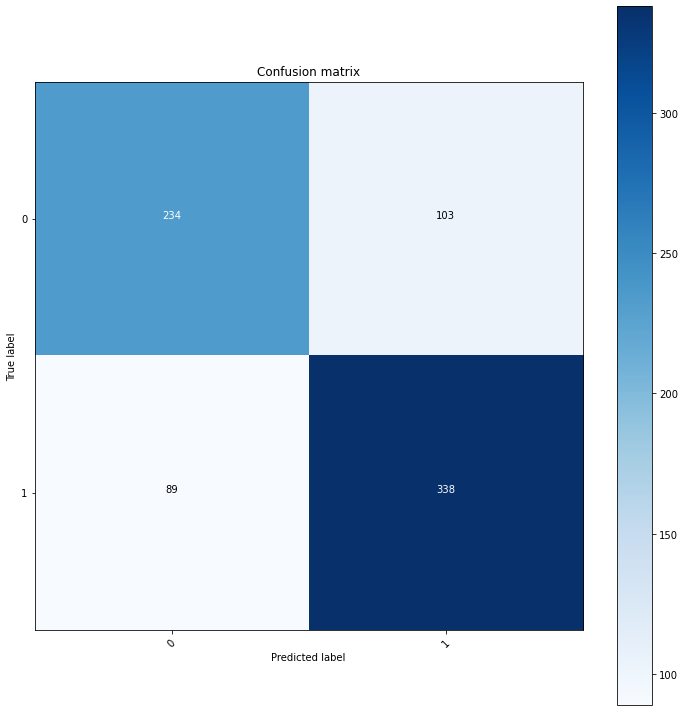

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat3, -2)["CM"], classes = [0, 1], filename = "results/CM_train_strat3.png");

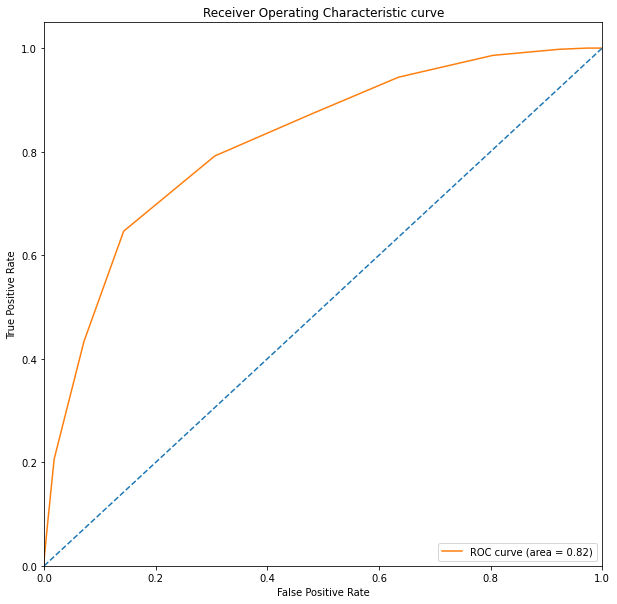

In [29]:
roc = get_metrics(train_result_strat3, -2)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat3.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 1, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 2, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, -2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, -2, pretty_print = True)
)

Strategy 1:  {'ACC': 0.703125, 'FPR': 0.42045454545454547, 'AUC': 0.7507102272727273, 'Ya': 0.6942148760330579, 'EF': 1.2816274634456455, 'REF': 80.76923076923077} 
Strategy 2:  {'ACC': 0.6614583333333334, 'FPR': 0.20454545454545456, 'AUC': 0.7488527097902098, 'Ya': 0.76, 'EF': 1.403076923076923, 'REF': 76.0} 
Strategy 3:  {'ACC': 0.765625, 'FPR': 0.3181818181818182, 'AUC': 0.8309659090909092, 'Ya': 0.7565217391304347, 'EF': 1.396655518394649, 'REF': 83.65384615384616} 
Strategy 4:  {'ACC': 0.734375, 'FPR': 0.2727272727272727, 'AUC': 0.8117351398601398, 'Ya': 0.7623762376237624, 'EF': 1.4074638233054075, 'REF': 76.23762376237623}


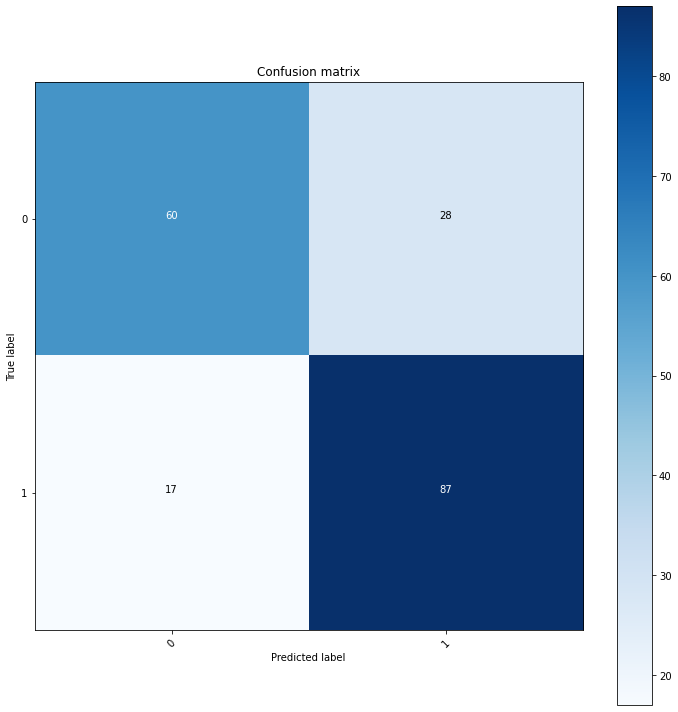

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat3, -2)["CM"], classes = [0, 1], filename = "results/CM_val_strat3.png");

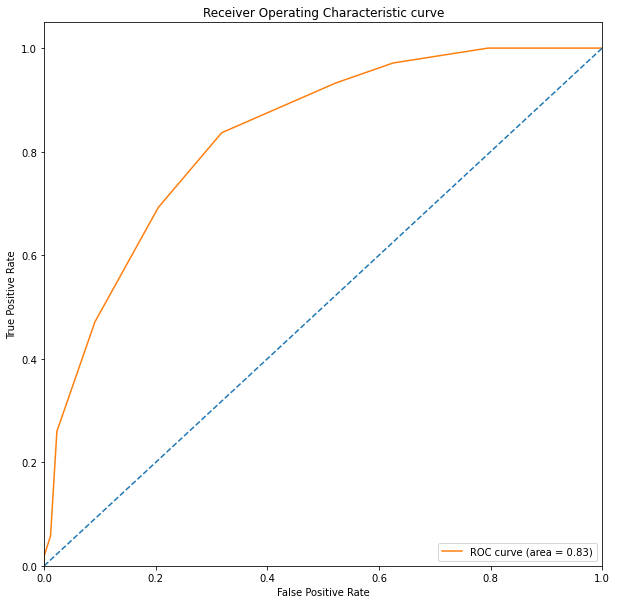

In [32]:
roc = get_metrics(val_result_strat3, -2)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat3.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 1, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 2, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, -2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, -2, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6903765690376569, 'FPR': 0.4716981132075472, 'AUC': 0.732657114484324, 'Ya': 0.6855345911949685, 'EF': 1.231900505981936, 'REF': 81.95488721804512} 
Strategy 2:  {'ACC': 0.6652719665271967, 'FPR': 0.20754716981132076, 'AUC': 0.7471981841395943, 'Ya': 0.7731958762886598, 'EF': 1.3894271761878927, 'REF': 77.31958762886597} 
Strategy 3:  {'ACC': 0.7489539748953975, 'FPR': 0.3018867924528302, 'AUC': 0.8311817279046674, 'Ya': 0.7664233576642335, 'EF': 1.3772570111409912, 'REF': 78.94736842105263} 
Strategy 4:  {'ACC': 0.7447698744769874, 'FPR': 0.22641509433962265, 'AUC': 0.812278337352816, 'Ya': 0.8, 'EF': 1.4375939849624062, 'REF': 80.0}


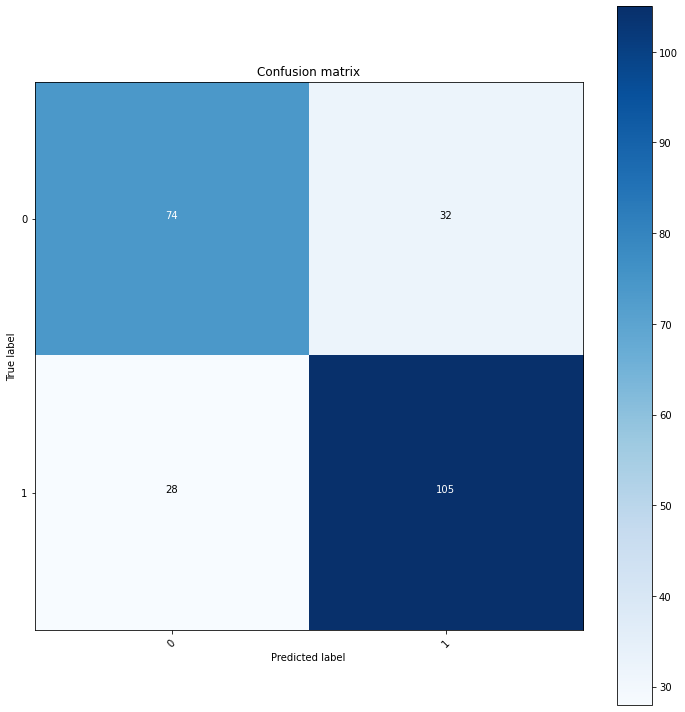

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat3, -2)["CM"], classes = [0, 1], filename = "results/CM_test_strat3.png");

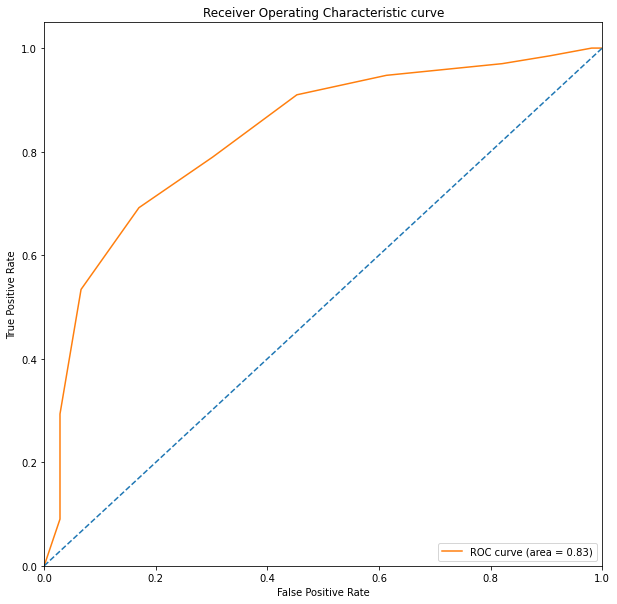

In [35]:
roc = get_metrics(test_result_strat3, -2)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat3.png");

#### **Clean up:**

In [36]:
os.remove("PIAScore.py")